In [2]:
import pandas as pd
from tensorflow import keras as kr

In [3]:
df = pd.read_csv("iris.csv")
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa

In [4]:
df["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df_dum = pd.get_dummies(df)
df_dum.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth  Species_setosa  \
0          5.1         3.5          1.4         0.2               1   
1          4.9         3.0          1.4         0.2               1   

   Species_versicolor  Species_virginica  
0                   0                  0  
1                   0                  0

In [6]:
df_X = df_dum.iloc[:, :4]
df_y = df_dum.iloc[:, 4:]
df_X.head(1)

SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2

In [7]:
df_y.head(1)

Species_setosa  Species_versicolor  Species_virginica
0               1                   0                  0

In [1]:
from sklearn.preprocessing import StandardScaler

In [8]:
model_nor = StandardScaler().fit(df_X)
df_X_nor = model_nor.transform(df_X)
df_X_nor[:3, ]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [9]:
df_y.head(2)

Species_setosa  Species_versicolor  Species_virginica
0               1                   0                  0
1               1                   0                  0

In [10]:
df_y.head(2).values

array([[1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [49]:
metric = "accuracy"
mc = kr.callbacks.ModelCheckpoint("best_model_iris.h5", 
                                  monitor = "accuracy", 
                                  mode = "max", # 정확도가 최대가 되도록
                                  save_best_only = True)

model = kr.Sequential([kr.layers.Dense(9, activation = "relu", input_shape = [4]),
                       kr.layers.Dense(3, activation = "softmax")])
model.compile(loss = "categorical_crossentropy",
              optimizer = kr.optimizers.RMSprop(learning_rate = 0.001),
              metrics = [metric])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 9)                 45        
                                                                 
 dense_8 (Dense)             (None, 3)                 30        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(df_X_nor, df_y,
                    validation_split = 0.2,
                    epochs = 100, callbacks = [mc], verbose = 1)

Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 1.3065 - accuracy: 0.1750 - val_loss: 0.6479 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2465 - accuracy: 0.1750 - val_loss: 0.6539 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.2066 - accuracy: 0.1833 - val_loss: 0.6584 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1737 - accuracy: 0.1917 - val_loss: 0.6647 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 1.1436 - accuracy: 0.2167 - val_loss: 0.6695 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 1.1163 - accuracy: 0.2417 - val_loss: 0.6753 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0904 - accuracy: 0.2667 - val_loss: 0.6798 - val_accuracy: 1.0000
Epoch 8/100
4/4 [====

4/4 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.9000 - val_loss: 0.7243 - val_accuracy: 0.6000
Epoch 60/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4127 - accuracy: 0.9000 - val_loss: 0.7166 - val_accuracy: 0.6000
Epoch 61/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4060 - accuracy: 0.9000 - val_loss: 0.7120 - val_accuracy: 0.6000
Epoch 62/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4004 - accuracy: 0.9000 - val_loss: 0.7091 - val_accuracy: 0.6000
Epoch 63/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3941 - accuracy: 0.9083 - val_loss: 0.7032 - val_accuracy: 0.6000
Epoch 64/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3886 - accuracy: 0.9083 - val_loss: 0.6975 - val_accuracy: 0.6000
Epoch 65/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3830 - accuracy: 0.9083 - val_loss: 0.6947 - val_accuracy: 0.6000
Epoch 66/100
4/4 [==============

<AxesSubplot:xlabel='epoch'>

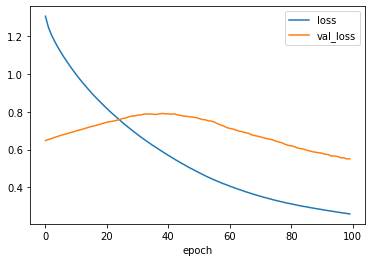

In [51]:
df_hist = pd.DataFrame(history.history)
df_hist["epoch"] = history.epoch
df_hist[["loss", "val_loss", "epoch"]].plot.line(x = "epoch")

In [52]:
pred = model.predict(df_X_nor)
pred[0]

array([0.99296665, 0.00300688, 0.00402649], dtype=float32)

In [53]:
df_y.columns

Index(['Species_setosa', 'Species_versicolor', 'Species_virginica'], dtype='object')

In [54]:
labels = df_y.columns.str.replace(".*?_", "", regex = True).to_list()
labels

['setosa', 'versicolor', 'virginica']

In [55]:
labels[pred[0].argmax()]

'setosa'

In [56]:
pred_classes = [labels[pred_sub.argmax()] for pred_sub in pred]
# pred_classes

In [57]:
pd.crosstab(df["Species"], pred_classes)

col_0       setosa  versicolor  virginica
Species                                  
setosa          50           0          0
versicolor       0          50          0
virginica        0          17         33

In [60]:
model_backup = model
model_backup.get_weights()

[array([[-0.23288968,  0.3473935 ,  0.8242169 ,  0.25763848,  0.23400143,
         -0.11749995,  0.34622377, -0.8296469 , -0.765714  ],
        [ 0.07045266,  0.53576446, -0.24773644, -0.11559536, -0.5718068 ,
         -0.9139296 , -0.31982186,  0.7897925 ,  0.54746485],
        [-0.7409987 , -0.8689657 ,  0.02088722, -0.35951418,  0.12506117,
          1.032578  ,  0.35990784, -0.8134185 , -0.80631065],
        [-0.08521794, -0.17300056, -0.16712591, -0.20634359, -0.11975963,
          0.7738264 ,  0.9627292 , -0.00129521,  0.5710141 ]],
       dtype=float32),
 array([ 0.1528909 , -0.0474386 , -0.06762169, -0.23032466,  0.3666993 ,
         0.39893404, -0.21970117,  0.31894776, -0.0755062 ], dtype=float32),
 array([[ 0.9112374 ,  0.28250614,  0.27586913],
        [ 0.05027292, -0.86982954, -0.40387672],
        [-0.96950394, -0.20295496,  0.21756455],
        [-0.25029984, -0.93358195,  0.21951936],
        [-0.89252317,  1.0051525 , -0.27084976],
        [-0.5800625 ,  0.03731515, -0

In [61]:
model.load_weights("best_model_iris.h5")
model.get_weights()

[array([[-0.21715058,  0.36916882,  0.81418604,  0.2738177 ,  0.22658147,
         -0.12282752,  0.3476723 , -0.81140655, -0.7517119 ],
        [ 0.06166103,  0.519913  , -0.24961817, -0.11264066, -0.5663331 ,
         -0.893313  , -0.31286108,  0.79457283,  0.5572076 ],
        [-0.7198045 , -0.8452671 ,  0.00202654, -0.34312278,  0.12713087,
          1.0095516 ,  0.34232777, -0.79127526, -0.786306  ],
        [-0.0631801 , -0.14931968, -0.18878148, -0.1920282 , -0.1049629 ,
          0.7514297 ,  0.9405871 ,  0.02145619,  0.5915887 ]],
       dtype=float32),
 array([ 0.15077816, -0.05007685, -0.06772024, -0.23712228,  0.34359622,
         0.37319508, -0.20725669,  0.31435516, -0.06172033], dtype=float32),
 array([[ 0.89092124,  0.292604  ,  0.30040535],
        [ 0.02621351, -0.8475043 , -0.3801447 ],
        [-0.94399345, -0.21116994,  0.22129235],
        [-0.27154437, -0.9152631 ,  0.24560462],
        [-0.86865234,  0.98907316, -0.2612852 ],
        [-0.55385643,  0.0391585 , -0

In [62]:
pred = model.predict(df_X_nor)
pred_classes = [labels[pred_sub.argmax()] for pred_sub in pred]
pd.crosstab(df["Species"], pred_classes)

col_0       setosa  versicolor  virginica
Species                                  
setosa          50           0          0
versicolor       0          50          0
virginica        0          17         33